In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'axes.spines.top': False, 'axes.spines.right': False, 'savefig.dpi': 1200})
import numpy as np

def running_mean(vals, gamma, ws=None):
    if ws is None:
        ws = max(int(np.log(0.01)/np.log(gamma)), 1)
    w = gamma*np.arange(ws)
    w /= w.sum()
    return np.convolve(w, vals)[len(w)-1:]

# Two Box Foraging Experiment

There are two boxes in the environment, each uses its own color cue to indicate food availability. An agent can move to different locations and push button if it is at a box.

In [2]:
from boxforage.environment import ForagingEnvironment

boxes_spec = {
    'num_boxes': 2,
    'num_grades': 5,
    'p_appear': 0.2,
    'p_vanish': 0.05,
    'p_true': 0.8,
    'p_false': 0.2,
}
reward_spec = {
    'food': 10.,
    'move': -2.,
    'time': -1.,
}

env = ForagingEnvironment(boxes_spec, reward_spec, episodic=False)

## Example of a random agent

In [3]:
T = 5000

obs = env.reset()
rewards = []
for t in range(T):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    rewards.append(reward)

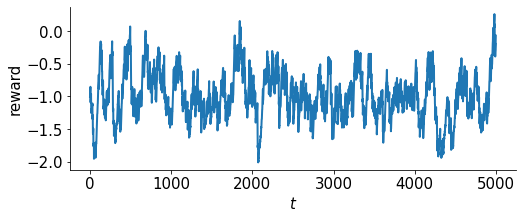

In [4]:
_, ax = plt.subplots(figsize=(8, 3))
ax.plot(running_mean(rewards, 0.95))
ax.set_xlabel(r'$t$')
ax.set_ylabel('reward')
plt.show()